In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

#Load Customer Table 
df_customers= pd.read_csv(r'C:/Users/harsh/OneDrive/Documents/DS Project2/Customers.csv', encoding= 'latin-1')
print(df_customers)


       CustomerKey  Gender               Name                 City State Code  \
0              301  Female      Lilly Harding       WANDEARAH EAST         SA   
1              325  Female       Madison Hull           MOUNT BUDD         WA   
2              554  Female      Claire Ferres            WINJALLOK        VIC   
3              786    Male  Jai Poltpalingada         MIDDLE RIVER         SA   
4             1042    Male    Aidan Pankhurst        TAWONGA SOUTH        VIC   
...            ...     ...                ...                  ...        ...   
15261      2099600  Female     Denisa Duková              Houston         TX   
15262      2099618    Male   Justin Solórzano               Mclean         VA   
15263      2099758    Male    Svend Petrussen           Wilmington         NC   
15264      2099862  Female       Lorenza Rush            Riverside         CA   
15265      2099937    Male   Zygmunt Kaminski  Bloomfield Township         MI   

                   State Zi

In [2]:
df_customers['Birthday'] = pd.to_datetime(df_customers['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date
df_customers


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [3]:

df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df_customers.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [5]:
df_customers.dropna(inplace= True)
df_customers.isnull().sum()


CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [6]:
df_customers.drop(["State Code","Zip Code"],axis=1,inplace=True)

Text(0.5, 1.0, 'Customers per Country')

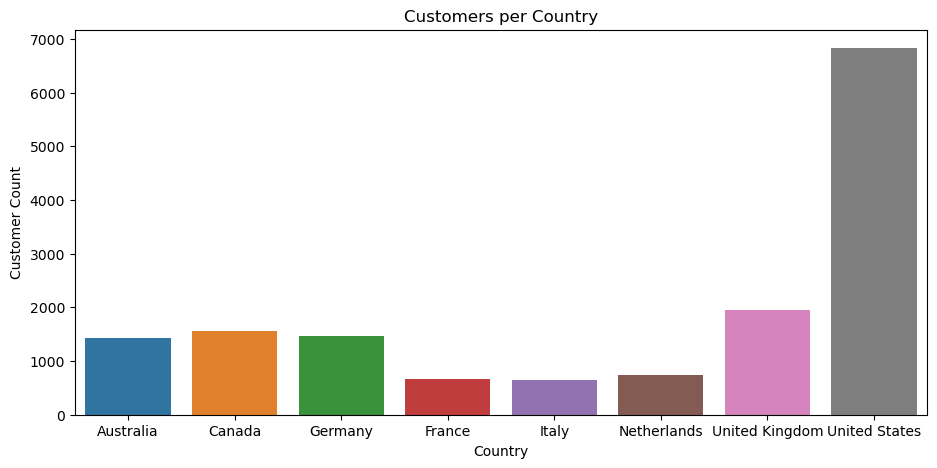

In [5]:
# visualize country counts
plt.figure(figsize=(11,5))
sns.countplot(x=df_customers["Country"],data=df_customers,hue="Country")
plt.xlabel("Country")
plt.ylabel("Customer Count")
plt.title("Customers per Country")

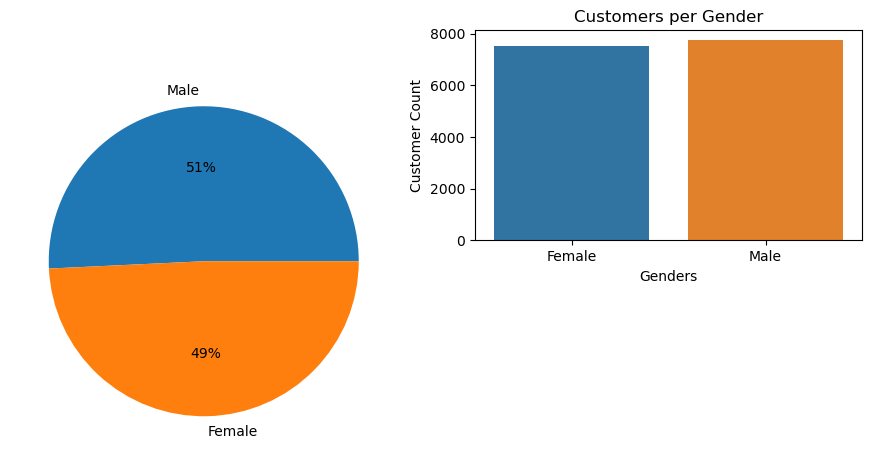

In [6]:
# visualize gender details
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
plt.pie(df_customers["Gender"].value_counts(), 
        autopct='%1.0f%%', 
        labels=['Male',  'Female'])
plt.subplot(2,2,2)
sns.countplot(x=df_customers["Gender"],data=df_customers,hue="Gender")
plt.xlabel("Genders")
plt.ylabel("Customer Count") 
plt.title("Customers per Gender")
plt.show()

In [14]:
#EXCHANGE RATES
#Load Table
df_exrates= pd.read_csv(r'C:\Users\harsh\OneDrive\Documents\DS Project2\Exchange_Rates.csv')
print(df_exrates)



            Date Currency  Exchange
0       1/1/2015      USD    1.0000
1       1/1/2015      CAD    1.1583
2       1/1/2015      AUD    1.2214
3       1/1/2015      EUR    0.8237
4       1/1/2015      GBP    0.6415
...          ...      ...       ...
11210  2/20/2021      USD    1.0000
11211  2/20/2021      CAD    1.2610
11212  2/20/2021      AUD    1.2723
11213  2/20/2021      EUR    0.8238
11214  2/20/2021      GBP    0.7126

[11215 rows x 3 columns]


In [19]:
df_exrates.rename(columns= {"Currency": "Currency Code"}, inplace= True)
df_exrates['Date'] = pd.to_datetime(df_exrates['Date'], format="%m/%d/%Y", errors='coerce')
df_exrates

,Date,Currency Code,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [11]:
df_exrates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           11215 non-null  datetime64[ns]
 1   Currency Code  11215 non-null  object        
 2   Exchange       11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [12]:
df_exrates.isnull().sum()

Date             0
Currency Code    0
Exchange         0
dtype: int64

Text(0.5, 1.0, 'Count per Currency')

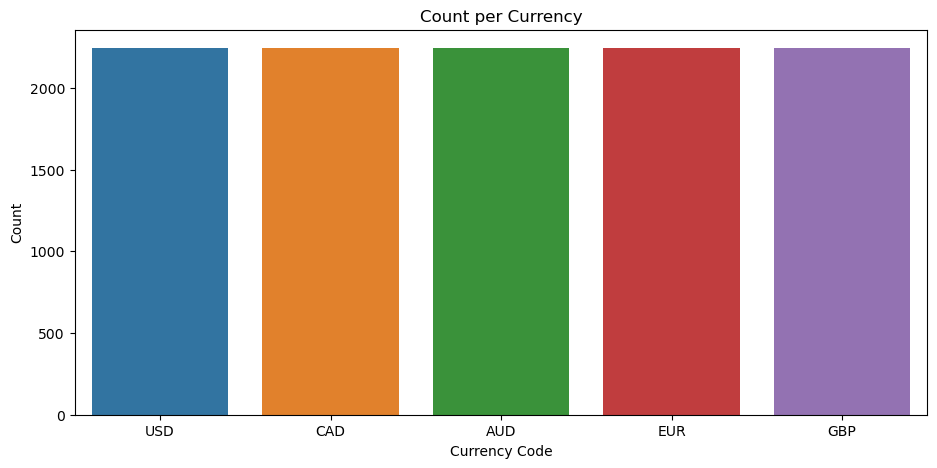

In [15]:
#Visualize Currency 
plt.figure(figsize=(11,5))
sns.countplot(x=df_exrates["Currency Code"],data=df_exrates,hue="Currency Code")
plt.xlabel("Currency Code")
plt.ylabel("Count")
plt.title("Count per Currency")

In [24]:
#PRODUCT TABLE
#LOAD TABLE TO DF
df_products = pd.read_csv(r'C:\Users\harsh\OneDrive\Documents\DS Project2\Products.csv')
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [17]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [18]:
df_products.isnull().sum()


ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [37]:
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].str.replace("$", "").str.replace(",", "")
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].astype(float)

df_products["Unit Price USD"] = df_products["Unit Price USD"].str.replace("$", "").str.replace(",", "")
df_products["Unit Price USD"] = df_products["Unit Price USD"].astype(float)

df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [20]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [21]:
# drop the column
df_products.drop(["SubcategoryKey"],axis=1,inplace=True)

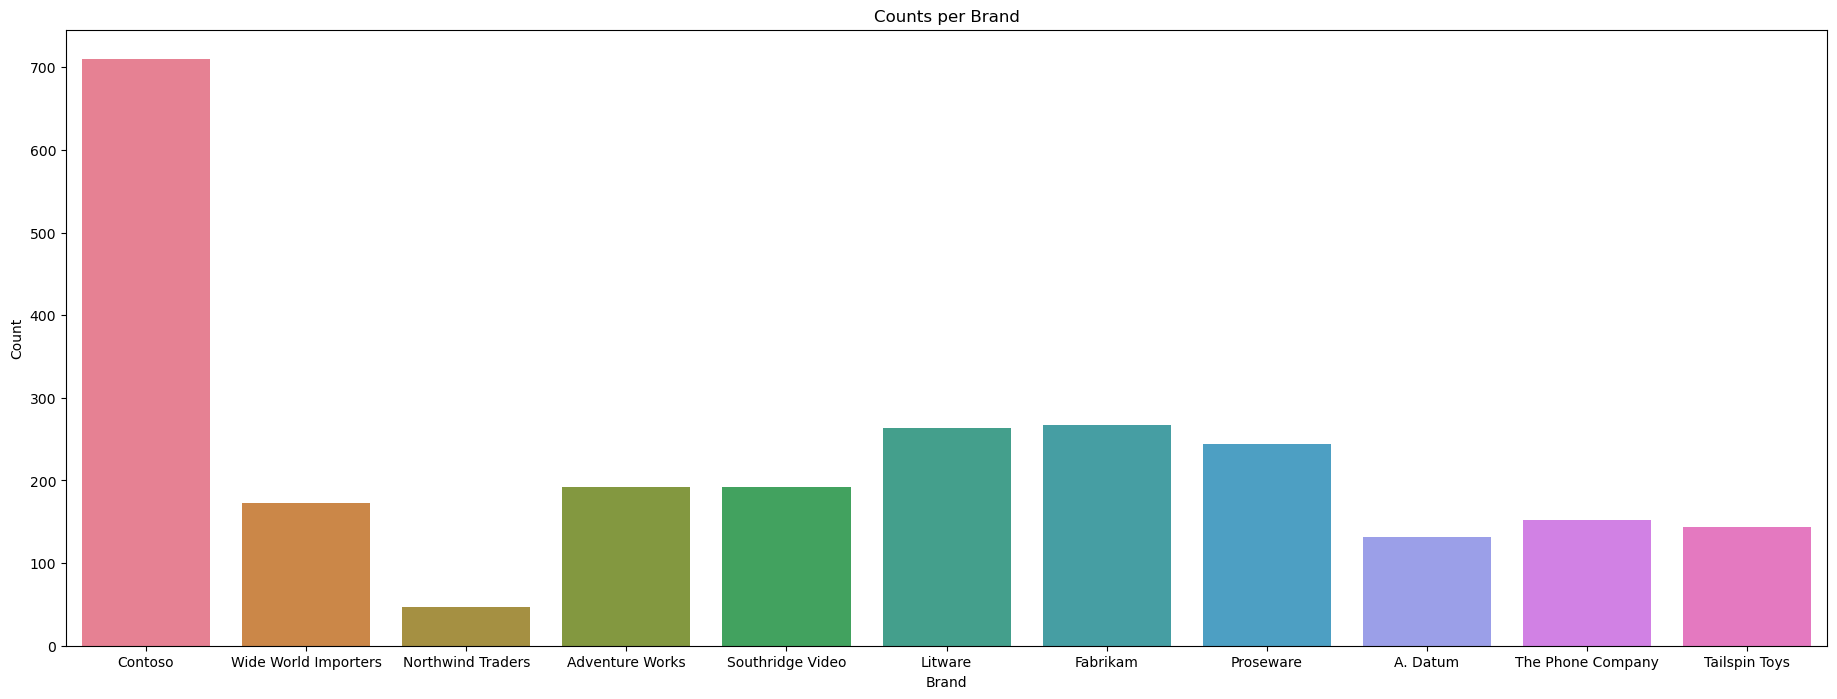

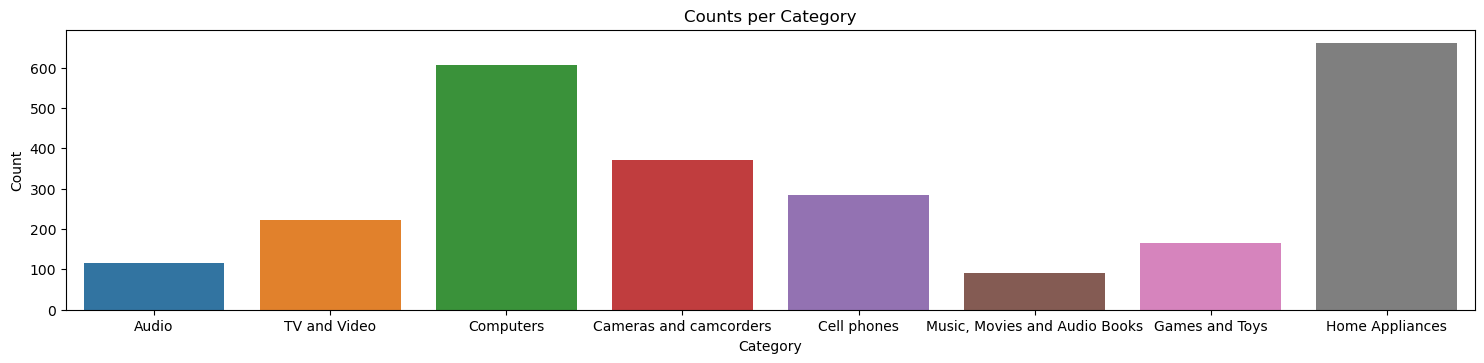

In [24]:
#visualize the brand and category
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
sns.countplot(x=df_products["Brand"],data=df_products,hue="Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Counts per Brand")
plt.show()
plt.figure(figsize=(40,8))
plt.subplot(2,2,2)
sns.countplot(x=df_products["Category"],data=df_products,hue="Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Counts per Category")
plt.show()

In [43]:
#Sales Table
#Load the table

df_sales = pd.read_csv(r'C:\Users\harsh\OneDrive\Documents\DS Project2\Sales.csv')
df_sales


,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [27]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [44]:
df_sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [45]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [46]:
# fill the missing values
df_sales["Delivery Date"]=df_sales["Delivery Date"].fillna(0)

In [49]:
#STORES
#LOAD THE TABLE
path = 'C:/Users/harsh/OneDrive/Documents/DS Project2/Stores.csv'
df_stores= pd.read_csv(path)
df_stores


,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [40]:
# check missing values
df_stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [50]:
df_stores.fillna(0)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [42]:
#check data types
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [51]:
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'], format="%m/%d/%Y", errors='coerce').dt.date


In [52]:
# replacing the nan value
df_stores = df_stores.replace({np.nan: None})

In [33]:
#CREATING THE SQL DATABASE
#sql connection
import mysql.connector
conn=mysql.connector.connect(host="localhost", user="root", password= "root", database="customer_sales")
my_cursor = conn.cursor()
my_cursor.execute("CREATE DATABASE IF NOT EXISTS customer_sales")
print("database created successfully")


database created successfully


In [23]:
#customer table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS customer_details(
                  CustomerKey INT,
                  Gender VARCHAR(255),
                  Name VARCHAR(255),
                  City VARCHAR(255),
                  State VARCHAR(255),
                  Country VARCHAR(255),
                  Continent VARCHAR(255),
                  Birthday VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [19]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [7]:

# insert values into customer table
insert_query='''INSERT INTO customer_details(
                  CustomerKey,
                  Gender,
                  Name,
                  City,
                  State,
                  Country,
                  Continent,
                  Birthday)
                  VALUES(%s,%s,%s,%s,%s,%s,%s,%s)'''
for index, row in df_customers.iterrows():
    my_cursor.execute(insert_query, (row['CustomerKey'], row['Gender'], row['Name'], row['City'], row['State'], row['Country'], row['Continent'], row['Birthday']))
conn.commit()
print('Inserted Successfully')


Inserted Successfully


In [8]:
# exchange table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_details(
                  Date VARCHAR(255),
                  Currency_Code VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

Table Created successfully


In [20]:
# insert values into exchange table
insert_query ='''INSERT INTO exchange_details(
                  Date,
                 Currency_Code,
                  Exchange)
                  VALUES (%s, %s, %s)'''
for index, row in df_exrates.iterrows():
    my_cursor.execute(insert_query, (row['Date'], row['Currency Code'], row['Exchange']))
conn.commit()
print('Inserted Successfully')

Inserted Successfully


In [34]:
# create Products table 
my_cursor.execute('''CREATE TABLE IF NOT EXISTS product_details(
                  ProductKey INT,
                  Product_Name VARCHAR(255),
                  Brand VARCHAR(255),
                  Color VARCHAR(255),
                  Unit_Cost_USD DECIMAL,
                  Unit_Price_USD DECIMAL,
                  Subcategory VARCHAR(255),
                  CategoryKey VARCHAR(255),
                  Category VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [38]:
#insert values into Products table
insert_query ='''INSERT INTO product_details(
                  ProductKey,
                  Product_Name,
                  Brand,
                  Color,
                  Unit_Cost_USD,
                  Unit_Price_USD,
                  Subcategory,
                  CategoryKey,
                  Category)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
for index, row in df_products.iterrows():
    my_cursor.execute(insert_query, (row['ProductKey'], row['Product Name'], row['Brand'], row['Color'], row['Unit Cost USD'], row['Unit Price USD'], row['Subcategory'], row['CategoryKey'], row['Category']))
conn.commit()
print('Inserted Successfully')

Inserted Successfully


In [39]:
#sales table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales_details(
                  Order_Number INT,
                  Line_Item INT,
                  Order_Date VARCHAR(255),
                  Delivery_Date VARCHAR(255),
                  CustomerKey INT,
                  StoreKey INT,
                  ProductKey INT,
                  Quantity INT,
                  Currency_Code VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [47]:
#insert values into sales table
insert_query ='''INSERT INTO sales_details(
                  Order_Number,
                  Line_Item,
                  Order_Date,
                  Delivery_Date,
                  CustomerKey,
                  StoreKey,
                  ProductKey,
                  Quantity,
                  Currency_Code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
for index, row in df_sales.iterrows():
    my_cursor.execute(insert_query, (row['Order Number'], row['Line Item'], row['Order Date'], row['Delivery Date'], row['CustomerKey'], row['StoreKey'], row['ProductKey'], row['Quantity'], row['Currency Code']))
conn.commit()
print('Inserted Successfully')

Inserted Successfully


In [48]:
#store table creation
my_cursor.execute('''CREATE TABLE IF NOT EXISTS stores_details(
                  StoreKey INT,
                  Country VARCHAR(255),
                  State VARCHAR(255),
                  Square_Meters FLOAT,
                  Open_Date VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [53]:
# insert values into Store table
insert_query ='''INSERT INTO stores_details(
                 StoreKey,
                  Country,
                  State,
                  Square_Meters,
                  Open_Date)
                  VALUES (%s, %s, %s, %s, %s)'''
for index, row in df_stores.iterrows():
    my_cursor.execute(insert_query, (row['StoreKey'], row['Country'], row['State'], row['Square Meters'], row['Open Date']))
conn.commit()
print('Inserted Successfully')


Inserted Successfully
